In [1]:
###########################################
## Author : https://github.com/vidit1999 ##
###########################################

In [2]:
import re
import random
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
random.seed(0)
np.random.seed(0)

In [4]:
df = pd.read_csv("train.csv")
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [6]:
df.fillna(' ', inplace=True)

In [7]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [8]:
stop_words = stopwords.words('english')
lemma = WordNetLemmatizer()

def clean_text(text):
    text = text.lower() # lowering
    text = text.encode("ascii", "ignore").decode() # non ascii chars
    text = re.sub(r'\n',' ', text) # remove new-line characters
    text = re.sub(r'\W', ' ', text) # special chars
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # single characters
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) # single char at first
    text = re.sub(r'[0-9]', ' ', text) # digits
    text = re.sub(r'\s+', ' ', text, flags=re.I) # multiple spaces
    return ' '.join([lemma.lemmatize(word) for word in word_tokenize(text) if word not in stop_words])

In [9]:
%%time

clean_document = []

for _, row in df.iterrows():
    clean_document.extend(clean_text(row['title'] + ' ' + row['author'] + ' ' + row['text']).split())

Wall time: 3min 4s


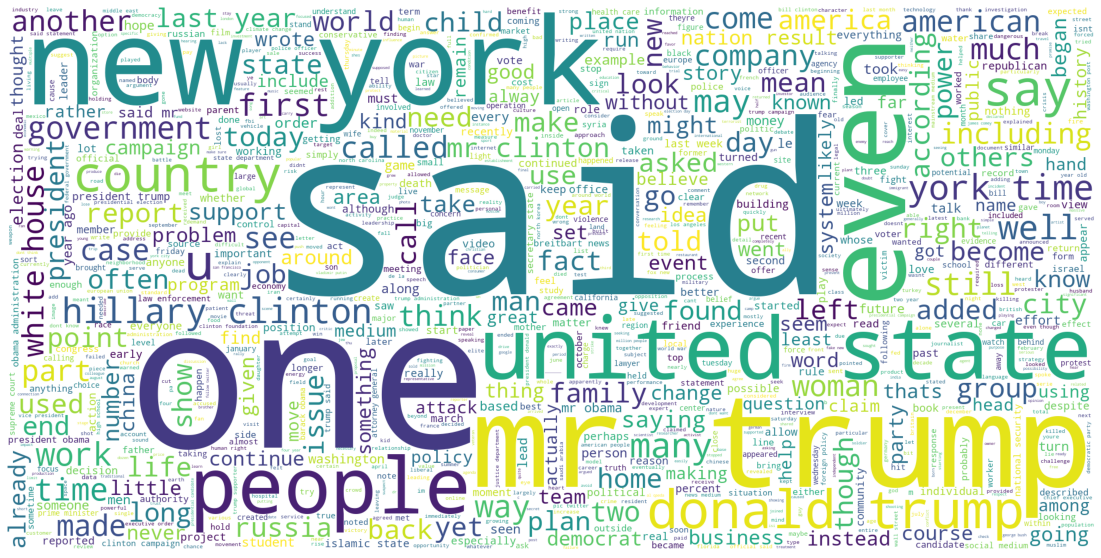

Wall time: 1min 53s


In [10]:
%%time

wc = WordCloud(
    width=2000, height=1000,
    background_color='white',
    max_words=1000, stopwords=STOPWORDS
).generate(' '.join(clean_document))

plt.figure(figsize=(20, 10))

plt.imshow(wc)
plt.axis("off")

plt.savefig('wordcloud.png', bbox_inches='tight')
plt.show()